In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import quandl as qua

## 1. Visualizando variables con Matplotlib y Seaborn

In [2]:
START_DATE="2018-10-01"
END_DATE = "2021-01-22"

In [25]:
q_api_key='1JVFsqLQ2ygdFFwCx19g'
TICKER = "FRED/DEXUSEU"
eurusd_raw = qua.get(TICKER, start_date=START_DATE, end_date=END_DATE, authtoken=q_api_key, collapse='monthly')
eurusd_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2018-10-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [26]:
TICKER = "ECB/EURGBP"
eurgbp_raw = qua.get(TICKER, start_date=START_DATE, end_date=END_DATE, authtoken=q_api_key, collapse='monthly')
eurgbp_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2018-10-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [27]:
TICKER = "ECB/EURCAD"
eurcad_raw = qua.get(TICKER, start_date=START_DATE, end_date=END_DATE, authtoken=q_api_key, collapse='monthly')
eurcad_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2018-10-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [28]:
eurusd_raw.reset_index(level=0, inplace=True)
eurgbp_raw.reset_index(level=0, inplace=True)
eurcad_raw.reset_index(level=0, inplace=True)

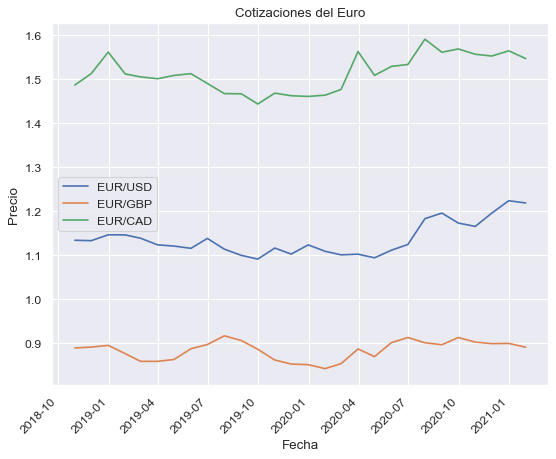

In [29]:
from matplotlib.pyplot import figure, grid
rs = np.random.RandomState(73)

eurusd = eurusd_raw.dropna()
eurgbp = eurgbp_raw.dropna()
eurcad = eurcad_raw.dropna()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
grid(True)
plt.xticks(rotation=45, ha="right")

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Cotizaciones del Euro')

plt.plot(eurusd['Date'], eurusd['Value'], label='EUR/USD')
plt.plot(eurgbp['Date'], eurgbp['Value'], label='EUR/GBP')
plt.plot(eurcad['Date'], eurcad['Value'], label='EUR/CAD')
plt.legend()

Text(0.5, 1.0, 'Cotizaciones del Euro')

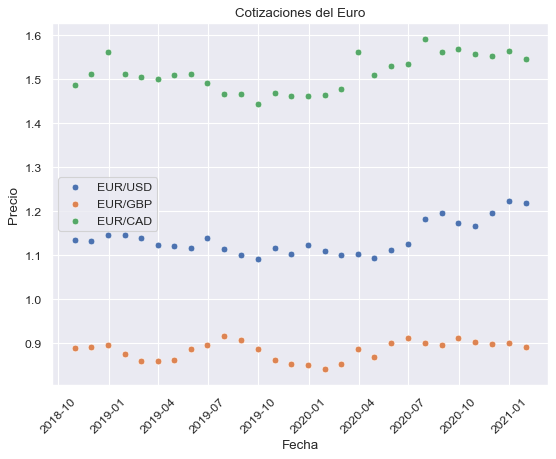

In [31]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set()
sns.scatterplot(data=eurusd, x="Date", y="Value", label='EUR/USD')
sns.scatterplot(data=eurgbp, x="Date", y="Value", label='EUR/GBP')
sns.scatterplot(data=eurcad, x="Date", y="Value", label='EUR/CAD')
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Cotizaciones del Euro')

#### Comentarios 1. En mi opinion el grafico de lineas expresa mejor el cambio en los precios de cada divisa.

## 2. Grafica creada con Bokeh

In [40]:
from bokeh.plotting import figure, output_file, save, gridplot, show
from bokeh.models import ColumnDataSource
import bokeh.models as bmo
from bokeh.models import DatetimeTickFormatter
from math import pi

In [41]:
eurusd['Date'] = pd.to_datetime(eurusd['Date'])
eurgbp['Date'] = pd.to_datetime(eurgbp['Date'])
eurcad['Date'] = pd.to_datetime(eurcad['Date'])

In [51]:
source = ColumnDataSource(eurusd)

p = figure(title="Precios Euro/Dolar Americano", x_axis_label='Fecha', y_axis_label='Precio', tools=["hover"])
p.title.align = "center"
p.xaxis.formatter=DatetimeTickFormatter(
        days=["%d %B %Y"],
        months=["%d %B %Y"],
        years=["%d %B %Y"],
    )
p.xaxis.major_label_orientation = pi/4
p.circle('Date', 'Value', source= source, legend_label="EUR/USD", line_width=2)
hover = bmo.HoverTool(
    tooltips=[
        ("index", "$index"),
        ('Value', '$value')
    ]
)
p.add_tools(hover)

In [52]:
source = ColumnDataSource(eurgbp)
b2 = figure(title="Precios Euro/Libra", x_axis_label='Fecha', y_axis_label='Precio', tools=["hover"])
b2.title.align = "center"
b2.xaxis.formatter=DatetimeTickFormatter(
        days=["%d %B %Y"],
        months=["%d %B %Y"],
        years=["%d %B %Y"],
    )
b2.xaxis.major_label_orientation = pi/4
b2.line('Date', 'Value', source= source, legend_label="EUR/GBP", line_width=2)
hover = bmo.HoverTool(
    tooltips=[
        ("index", "$index"),
        ('Value', '$value')
    ]
)
b2.add_tools(hover)

In [53]:
source = ColumnDataSource(eurcad)
b3 = figure(title="Precios Euro/Dolar Canadiense", x_axis_label='Fecha', y_axis_label='Precio', tools=["hover"])
b3.title.align = "center"
b3.xaxis.formatter=DatetimeTickFormatter(
        days=["%d %B %Y"],
        months=["%d %B %Y"],
        years=["%d %B %Y"],
    )
b3.xaxis.major_label_orientation = pi/4
b3.square('Date', 'Value', source= source, legend_label="EUR/CAD", line_width=2)
hover = bmo.HoverTool(
    tooltips=[
        ("index", "$index"),
        ('Value', '$value')
    ]
)
b3.add_tools(hover)

In [54]:
p2 = gridplot([[p, b2, b3]])
show(p2)
save(p2)

'C:\\Users\\saule\\AppData\\Local\\Temp\\tmpl7ps_ehc.html'

## 3. Escoger una variable y categorizarla

In [63]:
import numpy as np

sizes = []
a = np.where((eurusd_raw['Value']>1) & (eurusd_raw['Value']<1.10))
b = np.where((eurusd_raw['Value']>1.10) & (eurusd_raw['Value']<1.14))
c = np.where((eurusd_raw['Value']>1.14) & (eurusd_raw['Value']<2))

labels = 'Precio < 1.10', '1.10 < Precio < 1.14', '1.14 < Precio < 2'
sizes.append(len(a[0]))
sizes.append(len(b[0]))
sizes.append(len(c[0]))
explode = (0, 0.1, 0)

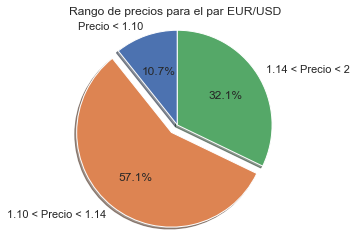

In [69]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Rango de precios para el par EUR/USD');

## 4. Estacionalidad

In [71]:
# Datos Diarios
START_DATE="2020-11-01"
END_DATE = "2020-12-31"

q_api_key='1JVFsqLQ2ygdFFwCx19g'
TICKER = "FRED/DEXUSEU"
eurusd_raw1 = qua.get(TICKER, start_date=START_DATE, end_date=END_DATE, authtoken=q_api_key, collapse='daily')
eurusd_raw1.reset_index(level=0, inplace=True)

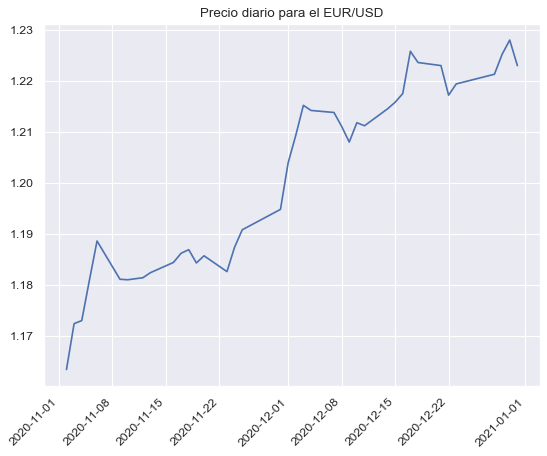

In [72]:
from matplotlib.pyplot import figure, grid

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
grid(True)
plt.xticks(rotation=45, ha="right")

plt.title('Precio diario para el EUR/USD')
plt.plot(eurusd_raw1['Date'], eurusd_raw1['Value'])

In [73]:
# Datos Semanales
START_DATE="2019-10-01"
END_DATE = "2021-01-01"

eurusd_raw2 = qua.get(TICKER, start_date=START_DATE, end_date=END_DATE, authtoken=q_api_key, collapse='weekly')
eurusd_raw2
eurusd_raw2.reset_index(level=0, inplace=True)

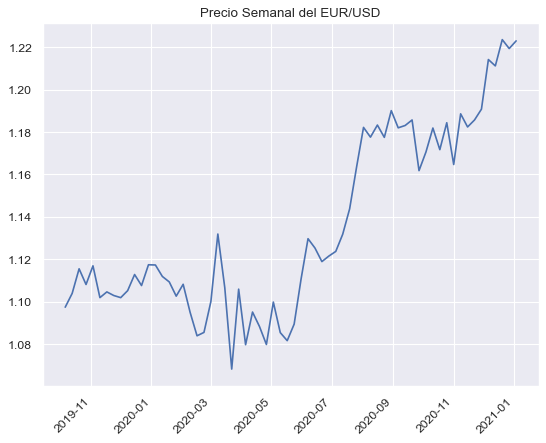

In [75]:
from matplotlib.pyplot import figure, grid

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
grid(True)
plt.xticks(rotation=45, ha="right")

plt.title('Precio Semanal del EUR/USD')
plt.plot(eurusd_raw2['Date'], eurusd_raw2['Value'])

In [77]:
# Datos Mensuales
START_DATE="2018-01-01"
END_DATE = "2021-01-01"

eurusd_raw3 = qua.get(TICKER, start_date=START_DATE, end_date=END_DATE, authtoken=q_api_key, collapse='monthly')
eurusd_raw3.reset_index(level=0, inplace=True)

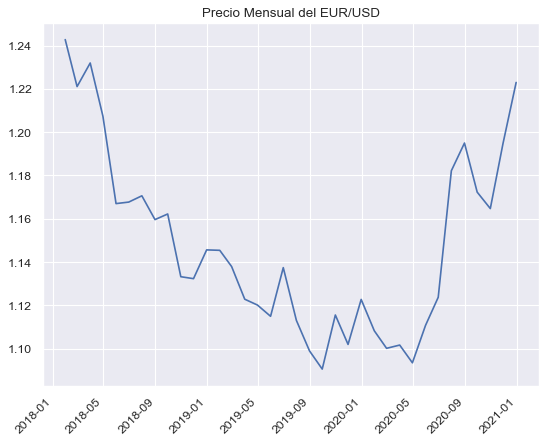

In [78]:
from matplotlib.pyplot import figure, grid

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
grid(True)
plt.xticks(rotation=45, ha="right")

plt.title('Precio Mensual del EUR/USD')
plt.plot(eurusd_raw3['Date'], eurusd_raw3['Value'])

#### Comentarios 4. 
Se puede apreciar estacionalidad en la grafica mensual. Se puede ver que entre los meses de Noviembre, Diciembre y Enero, el precio del par EUR/USD incrementa su precio.